In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
import pandas as pd

try:
    # Attempt to read the CSV using latin-1 encoding
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv',
                       encoding='latin-1', on_bad_lines='skip')

except UnicodeDecodeError:  # Handle potential encoding errors
    print("latin-1 encoding failed. Trying UTF-8...")
    try:
        # If latin-1 fails, try UTF-8 encoding
        data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv',
                           encoding='utf-8', on_bad_lines='skip')
    except Exception as e:  # Catch any other exceptions
        print(f"Error reading CSV: {e}")
        raise  # Re-raise the exception to propagate

print(data.head())  # Display the first few rows

<ipython-input-5-ff8dc88b9ff2>:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv',


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [7]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
data.shape

(181691, 135)

In [10]:
data.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday' : "Day", 'gname' : 'Group', 'country_txt': 'Country',
'region_txt': 'Region', 'provstate': 'Province', 'city': 'City', 'latitude': 'Latitude',
'longitude': 'Longitude', 'summary': 'Summary', 'attacktype1_txt': 'AttackType',
'targtypel_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'nkill': 'Killed',
'nwound': 'Wounded'}, inplace = True)

In [11]:
data = data[['Year', 'Month', 'Day', 'Country', 'Province', 'Region', 'City', 'Latitude', 'Longitude', "AttackType",
'Killed', 'Wounded', 'target1', 'Summary', 'Group', 'Weapon_type', 'motive']] # Removed 'Target_type' from the list

data.head()

,Year,Month,Day,Country,Province,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,target1,Summary,Group,Weapon_type,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Incendiary,NaN


In [12]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Province          421
Region              0
City              435
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
target1           638
Summary         66129
Group               0
Weapon_type         0
motive         131130
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Province     181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181256 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  target1      181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [14]:
data.describe()


,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [15]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
Province         2855
Region             12
City            36673
Latitude        48322
Longitude       48039
AttackType          9
Killed            205
Wounded           238
target1         86005
Summary        112492
Group            3537
Weapon_type        12
motive          14490
dtype: int64

In [42]:
print('Country with Highest Terrorist Attacks:', data['Country']. value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq


In [43]:
print('Country with Highest Terrorist Attacks:', data['Country']. value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq


In [44]:
print ('Maximum people killed in an attack are:', data['Killed'].max())

Maximum people killed in an attack are: 1570.0


In [45]:
print ("Year with the most attacks:", data['Year'].value_counts().idxmax())

Year with the most attacks: 2014


In [46]:
print("Month with the most attacks:", data['Month' ]. value_counts().idxmax())

Month with the most attacks: 5


In [47]:
print ("Most Attack Types:", data['AttackType' ].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


In [48]:
killData = data.loc[ :, 'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


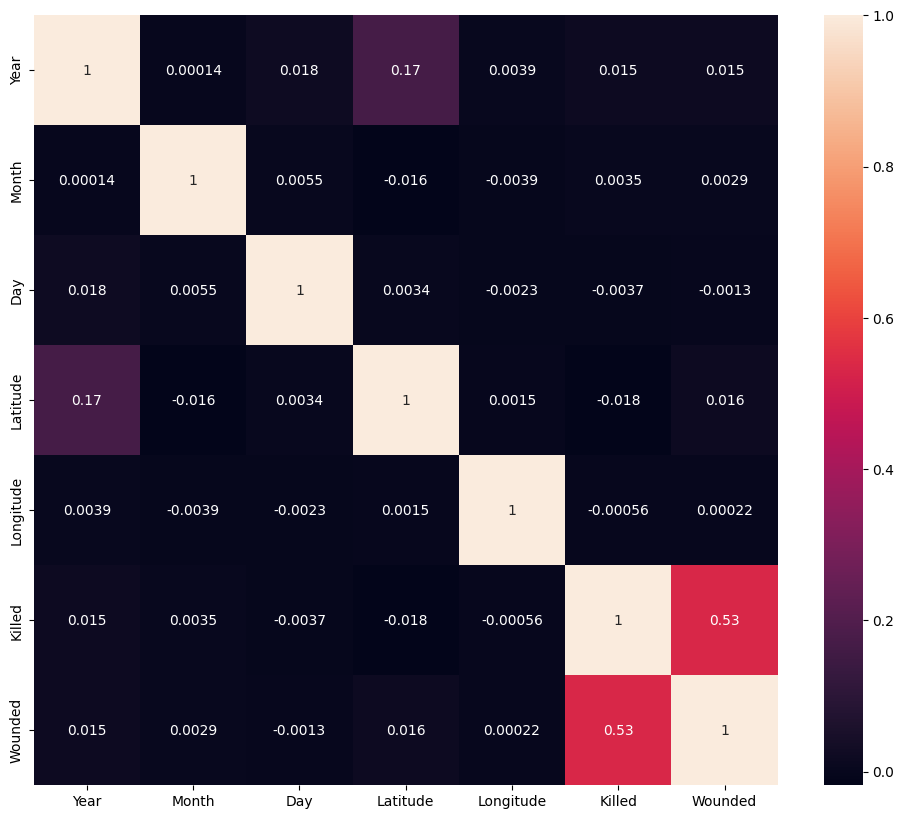

In [49]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot= True)
plt.show()

In [50]:
import warnings
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>


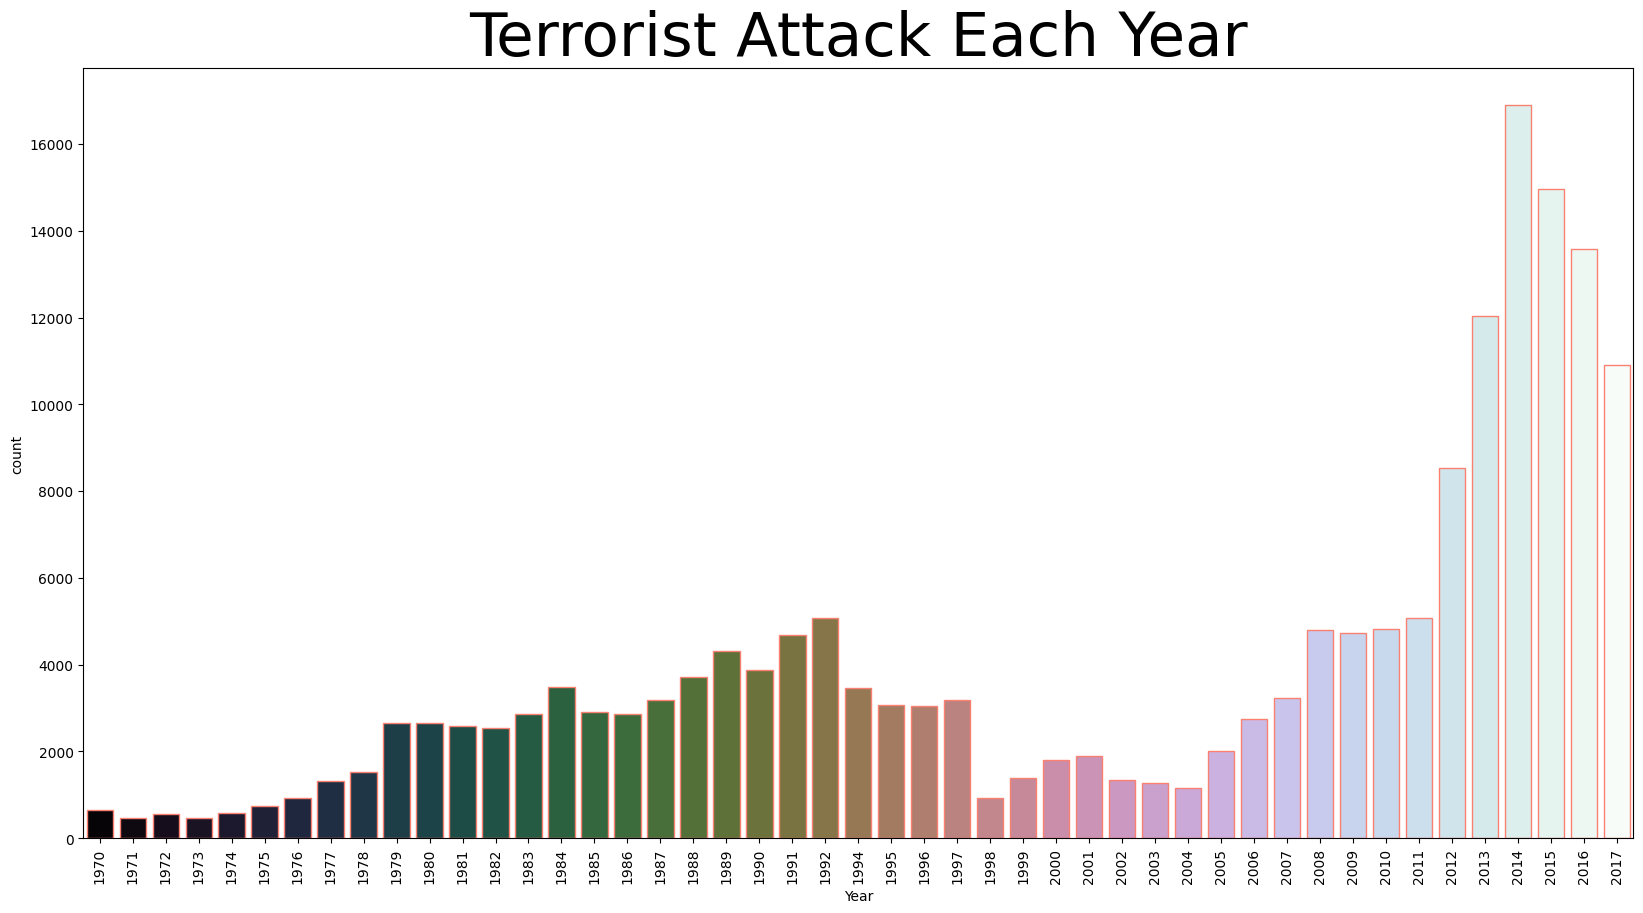

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'data' is a DataFrame
print(type(data))
plt.subplots(figsize=(20,10))
sns.countplot(x='Year', data=data, palette='cubehelix', edgecolor=sns.color_palette("dark:salmon_r", 10))  # Use 'x' to specify the column for counting
plt.xticks(rotation=90)
plt.title('Terrorist Attack Each Year', fontsize=44)
plt.show()

In [52]:
data['Country'].value_counts().head(10)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

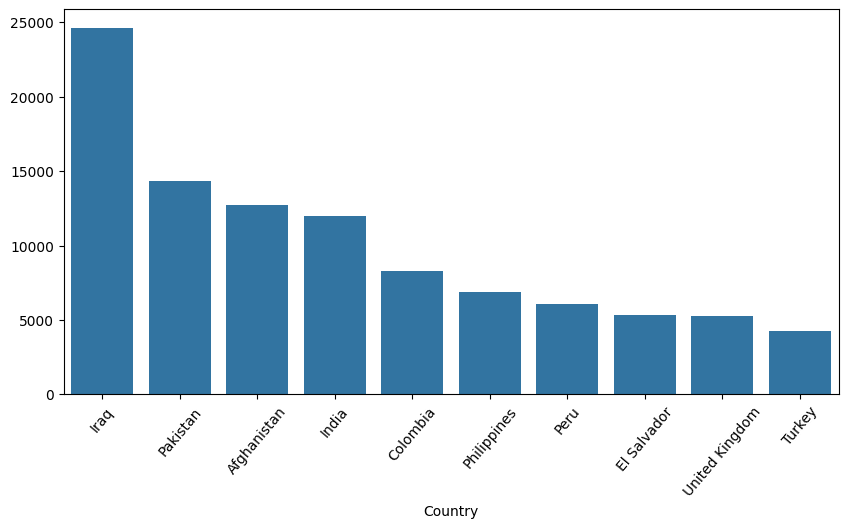

In [53]:
plt.figure(figsize=(10,5))
x = data['Country']. value_counts().values[:10]
y = data['Country']. value_counts (). index[:10]
sns.barplot(x=y, y=x)
plt.xticks (rotation=50)
plt.show()

In [54]:
data.Weapon_type.value_counts()[:10]

Weapon_type
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: count, dtype: int64

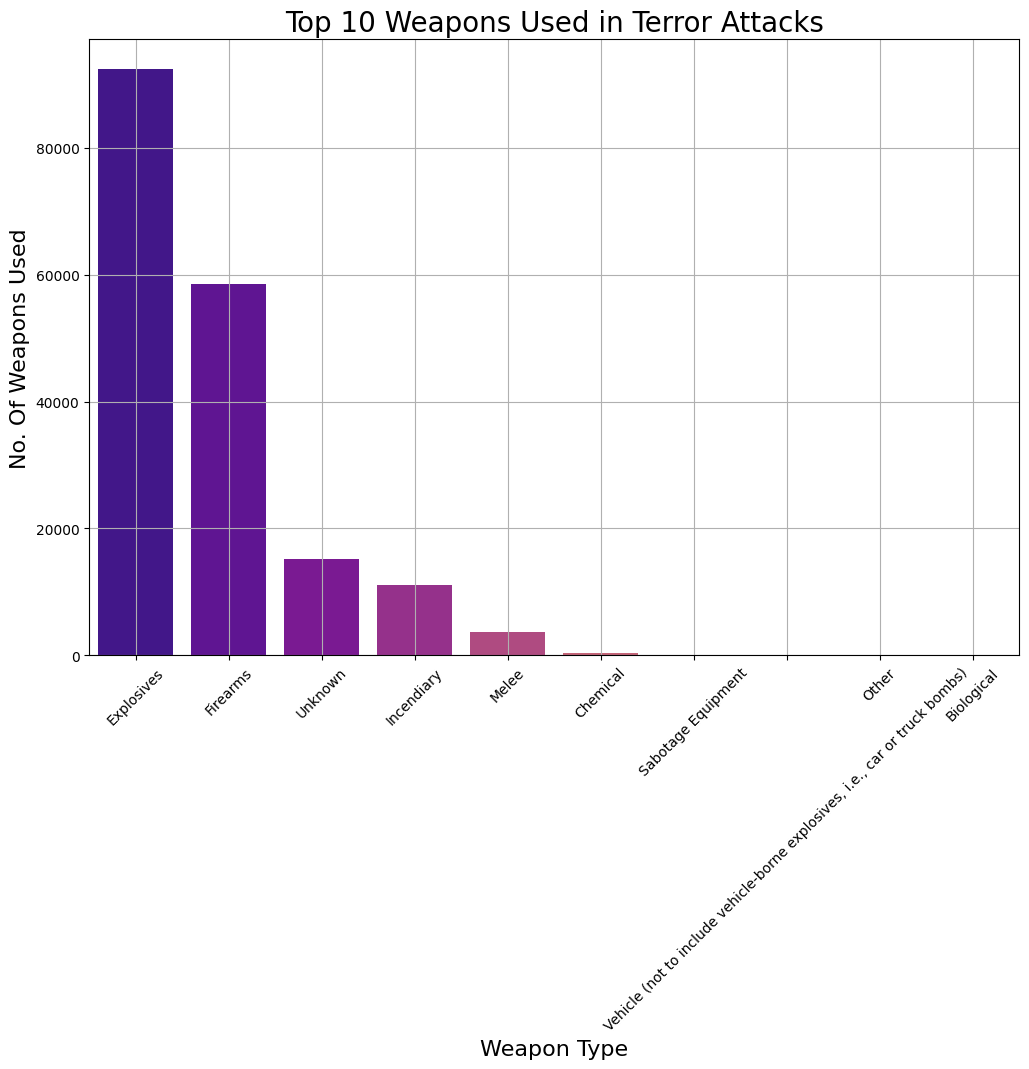

In [55]:
plt.figure(figsize=(12, 8))  # Adjusted size for readability

weapon_type_counts = data['Weapon_type'].value_counts()[:10]
sns.barplot(x=weapon_type_counts.index,
            y=weapon_type_counts.values,
            palette='plasma')
plt.title("Top 10 Weapons Used in Terror Attacks", fontsize=20)
plt.xlabel('Weapon Type', fontsize=16)
plt.ylabel('No. Of Weapons Used', fontsize=16)
plt.xticks(rotation=45)  # Adjust rotation if needed
plt.grid(True)
plt.show()

In [56]:
data['City'].value_counts().head(10)

City
Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: count, dtype: int64

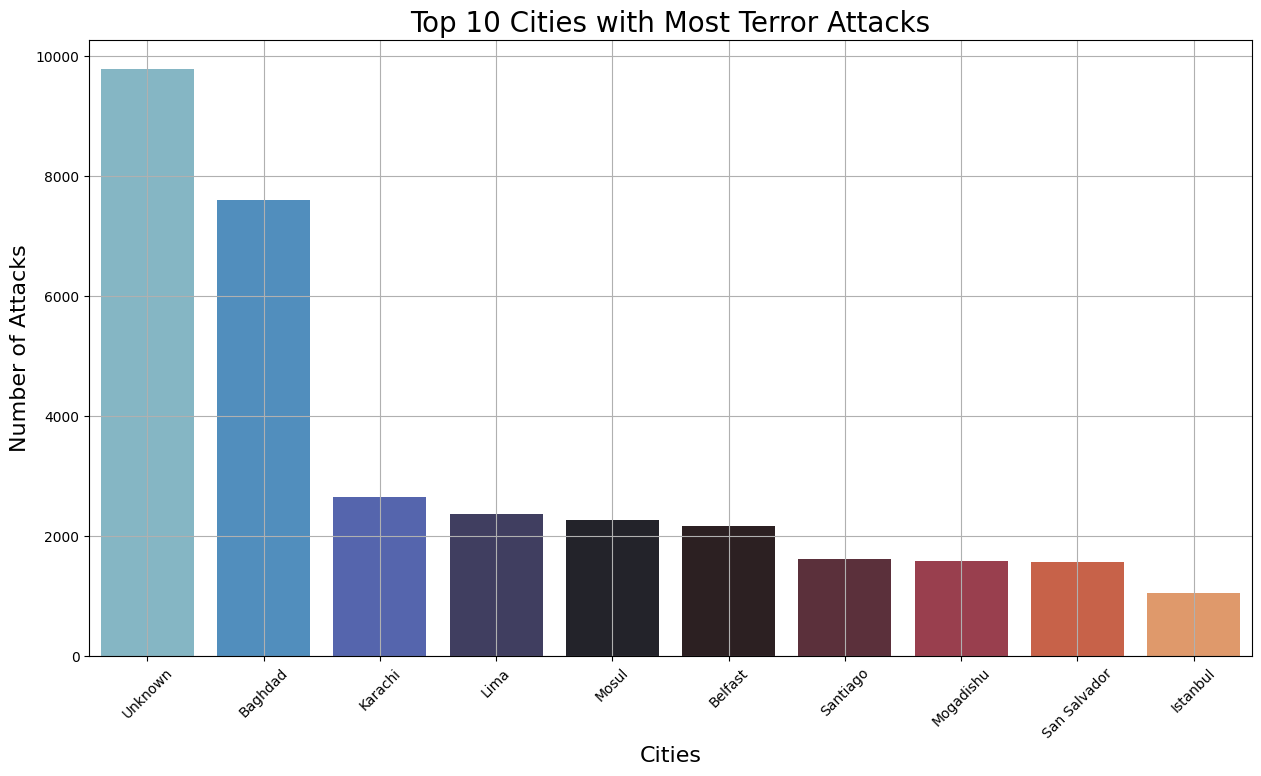

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is already a pandas DataFrame

plt.figure(figsize=(15, 8))  # Adjusted size

top_10_cities = data['City'].value_counts().head(10)
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='icefire')
plt.title("Top 10 Cities with Most Terror Attacks", fontsize=20)
plt.xlabel('Cities', fontsize=16)
plt.ylabel('Number of Attacks', fontsize=16)
plt.xticks(rotation=45)  # Adjust rotation if needed
plt.grid(True)
plt.show()

In [58]:
data['Region'].value_counts().head(10)

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64

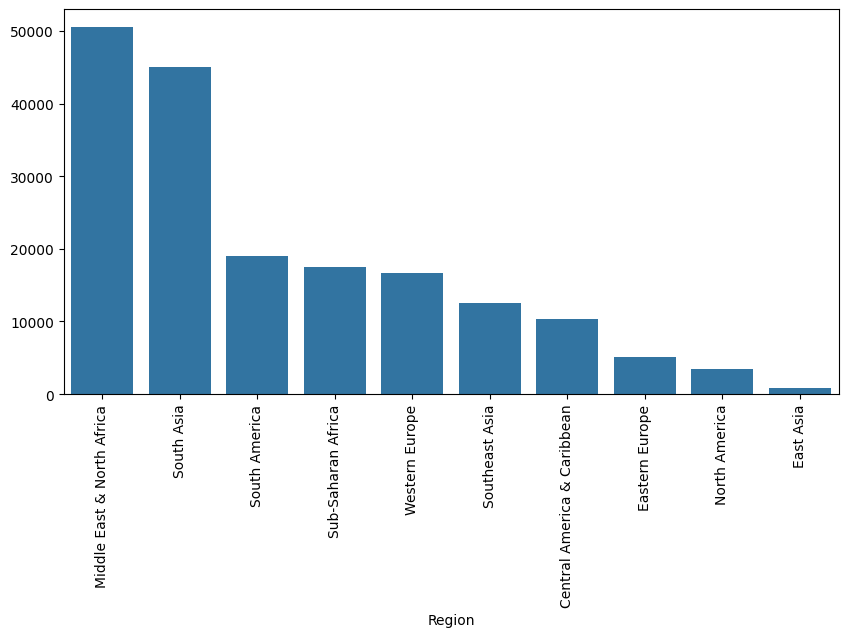

In [59]:
plt.figure(figsize=(10,5))
x = data['Region'].value_counts().values[ :10]
y = data['Region'].value_counts().index[:10]
sns.barplot(x=y,y=x)
plt.xticks(rotation=90)
plt.show()

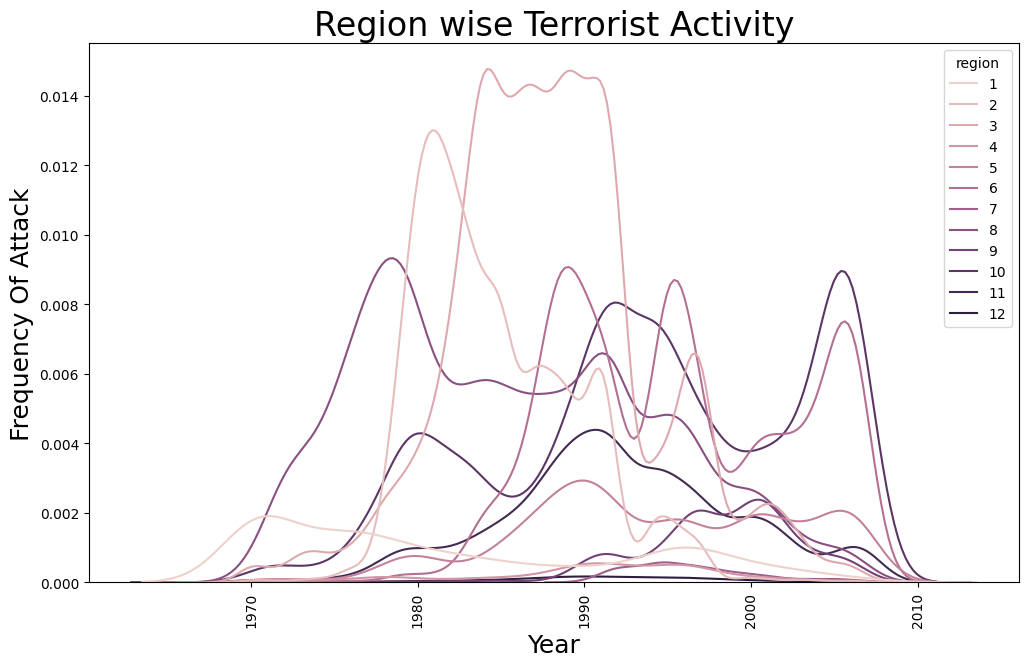

In [ ]:
plt.subplots(figsize=(12,7))
sns.kdeplot(data=data, x='iyear', hue='region')  # Use data= to specify the DataFrame
plt.title('Region wise Terrorist Activity', fontsize=24)
plt.xlabel('Year', fontsize=18)  # Corrected typo: xlable -> xlabel
plt.ylabel('Frequency Of Attack', fontsize=18)  # Corrected typo: ylable -> ylabel
plt.xticks(rotation = 90)
plt.show()

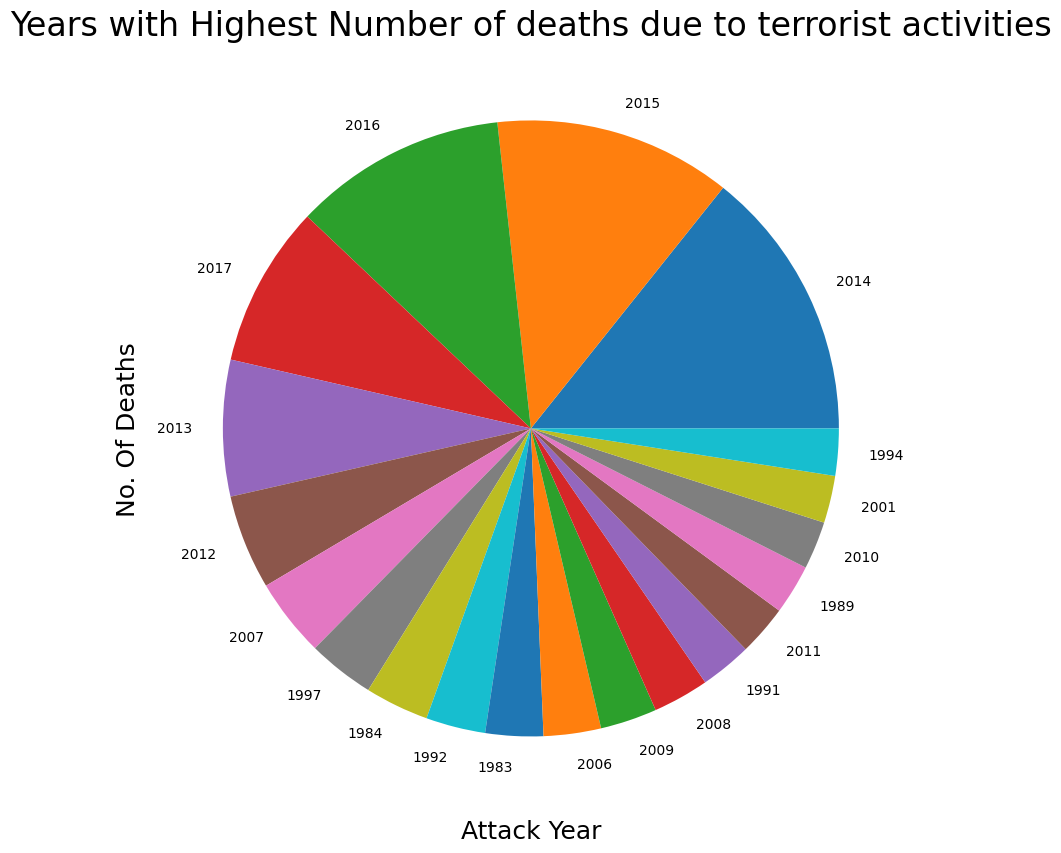

In [63]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20, 10))
data.groupby(['Year'])['Killed'].sum().sort_values(ascending=False).head(20).plot(kind='pie')
plt.title("Years with Highest Number of deaths due to terrorist activities", fontsize=24)
plt.xlabel('Attack Year', fontsize=18)
plt.ylabel('No. Of Deaths', fontsize=18)
plt.xticks (rotation = 90)
plt. show()



In [65]:
countryData = data.loc[:, 'Country']
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [68]:
fig_size= plt.rcParams["figure.figsize"] # Get the current figure size
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size # Set the new figure size using the correct key

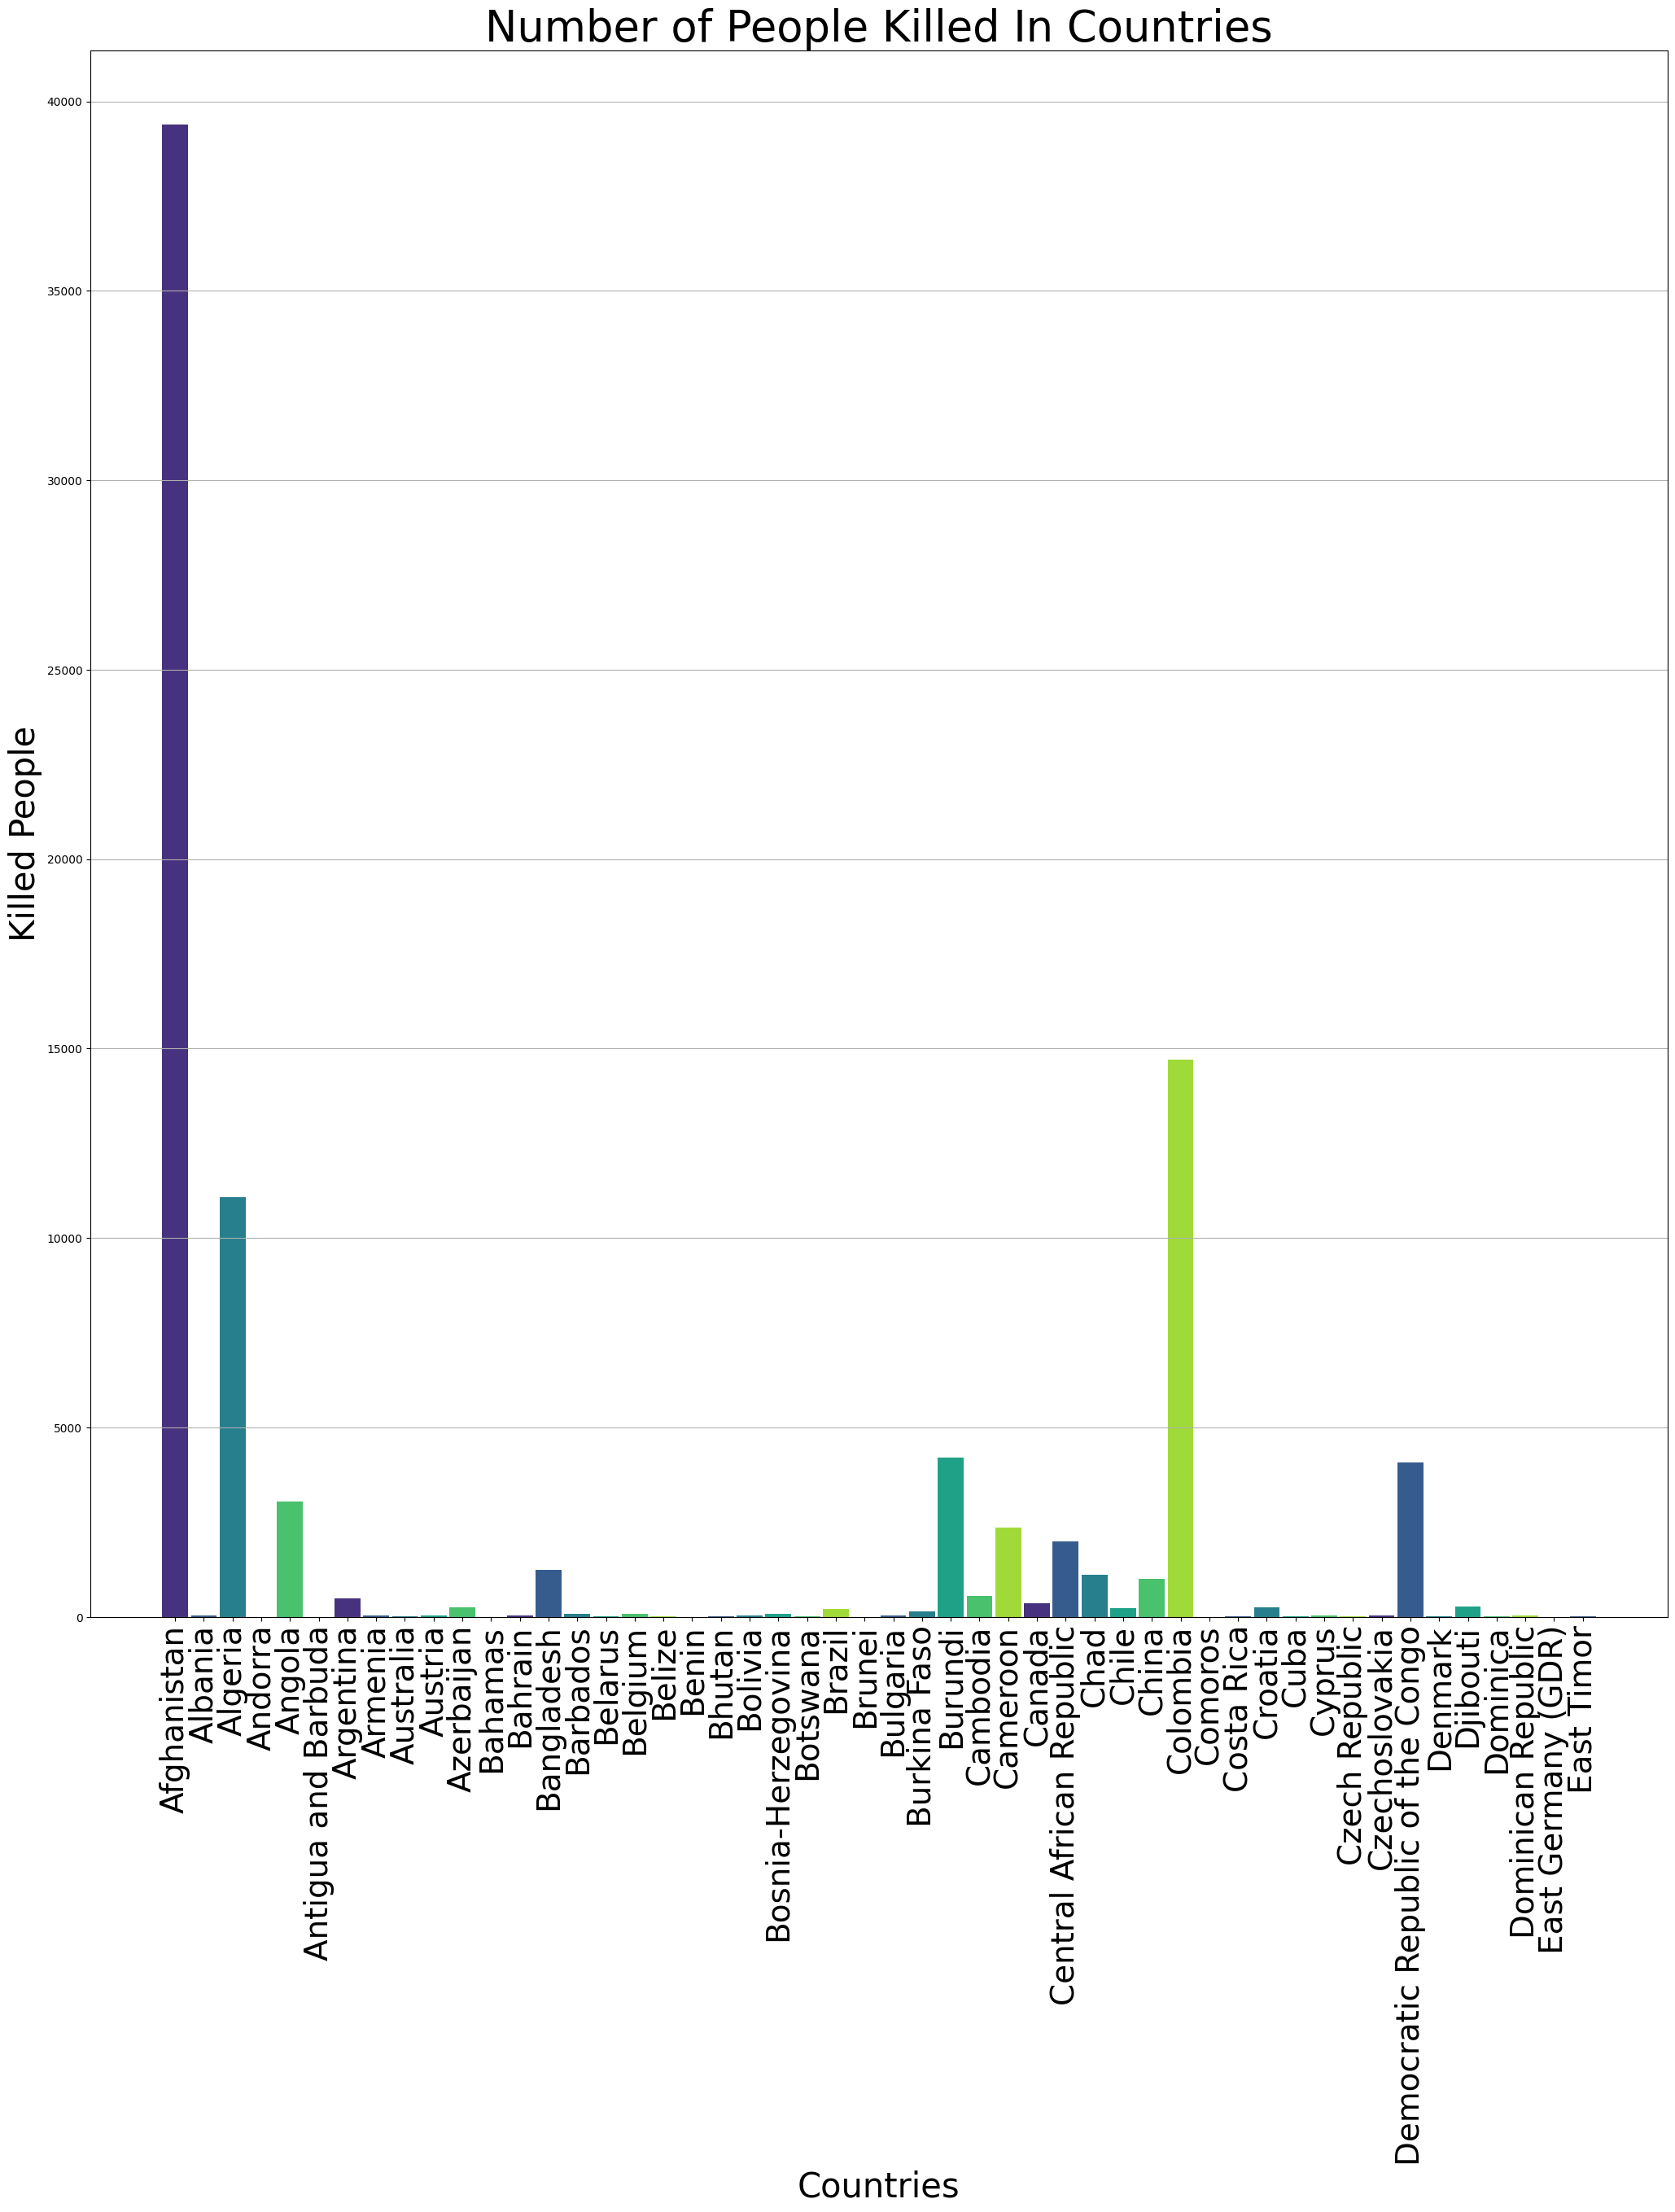

In [70]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float
colors = sns.color_palette("viridis")
# color list for bar chort bar color
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"] # Fix typo: pit -> plt
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=28, rotation=90)
plt. title('Number of People Killed In Countries', fontsize = 38)
# print(fig_size)
plt.show()

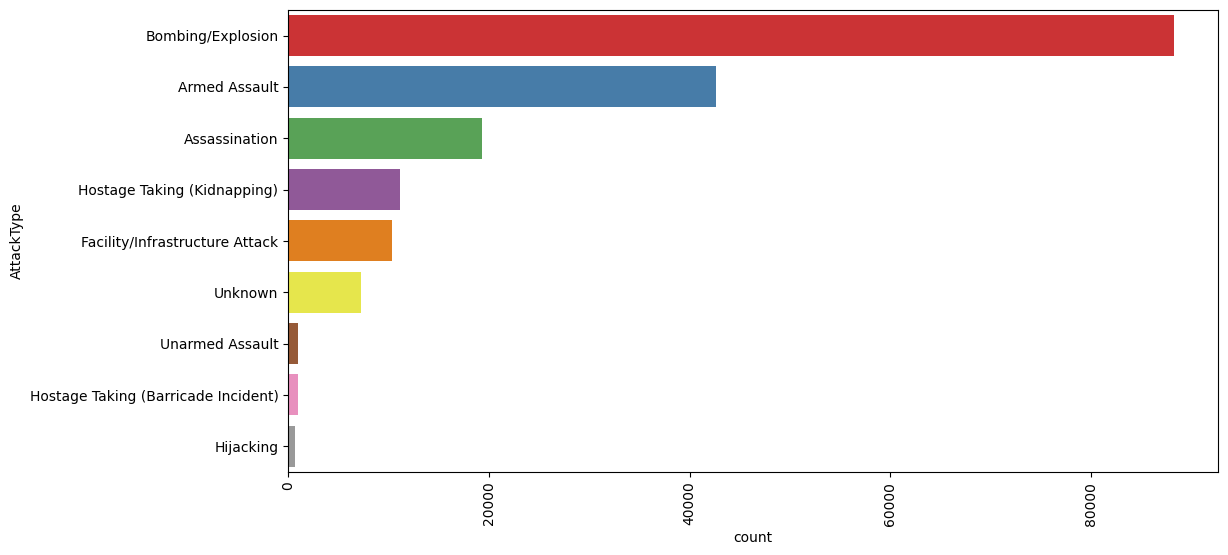

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(data['AttackType'], order=data['AttackType'].value_counts().index, palette='Set1') # Fix: Change 'set1' to 'Set1' for the correct palette name.
plt.xticks(rotation=90)
plt.show()

<ipython-input-18-b1dd98520c6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Group'].value_counts()[1:10].index, y=data['Group'].value_counts()[1:10].values, palette='Set1')


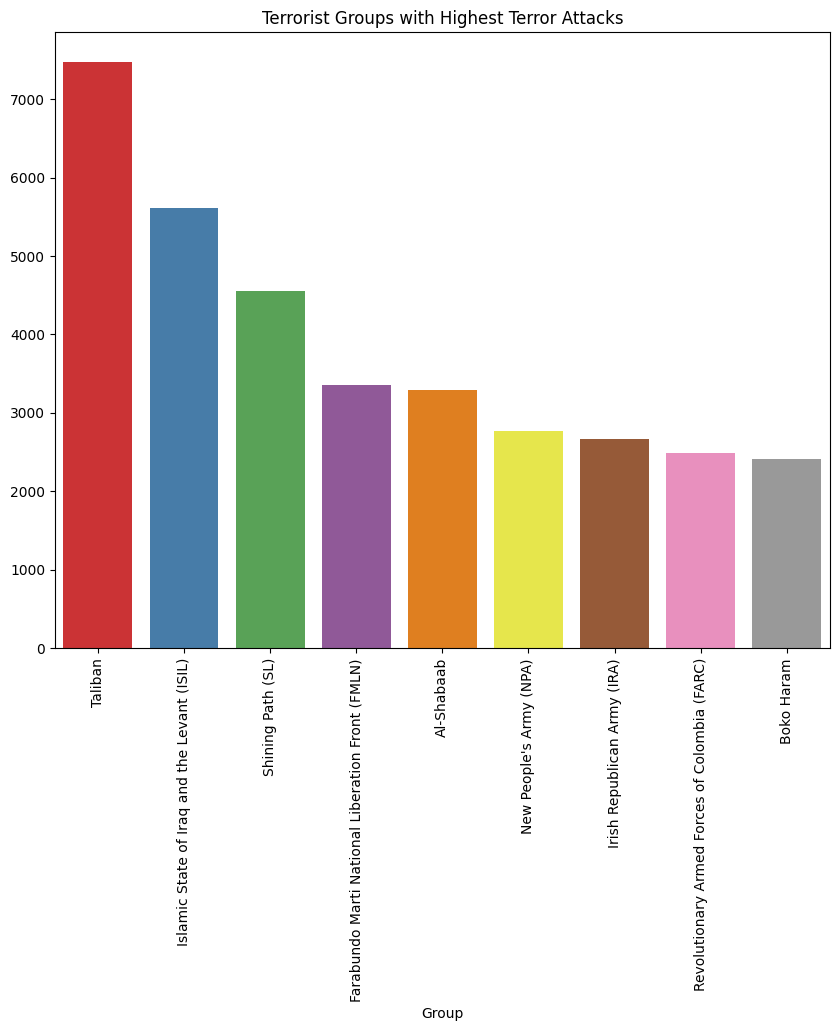

In [18]:
sns.barplot(x=data['Group'].value_counts()[1:10].index, y=data['Group'].value_counts()[1:10].values, palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

from the graph we came to know taliban is rthe most deadliest group

Most affected cities in india

In [19]:
group_country = data.groupby( 'Country')
india = group_country.get_group( 'India')


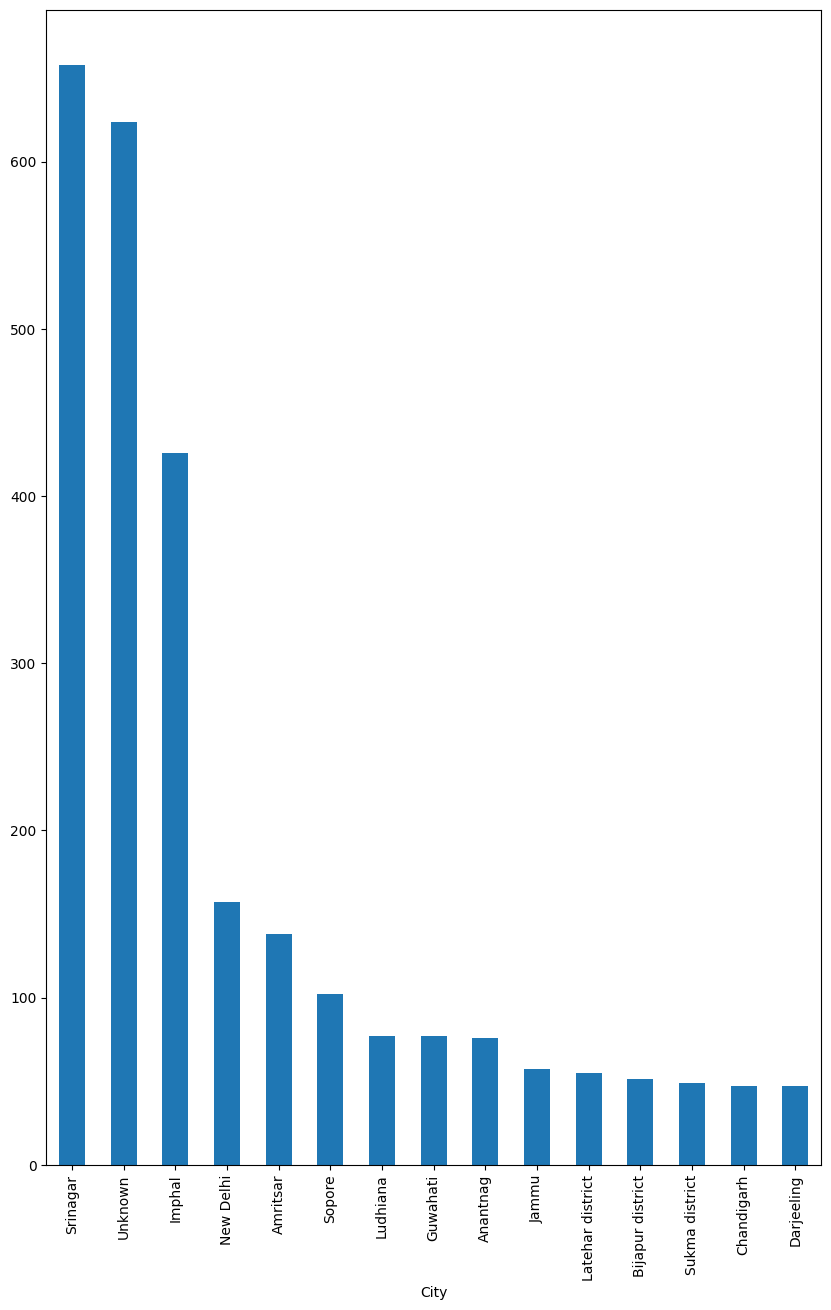

In [21]:
india['City'].value_counts().nlargest(15).plot(kind='bar', figsize= (10,15) )
plt.show()

timeline

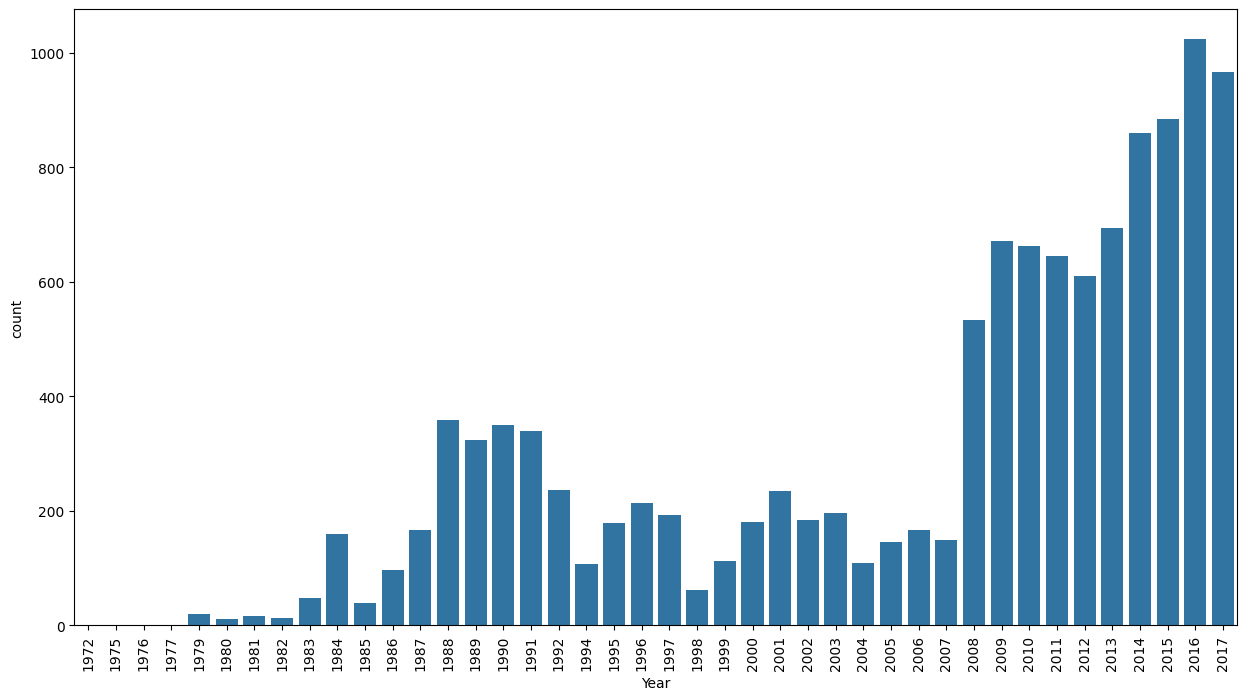

In [24]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.countplot(x='Year', data=india) # Specify 'x' and 'data' for clarity
plt.xticks(rotation=90)
plt.show()

deadlist terrorist groups in india

<ipython-input-27-d1885da52037>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=india['Group'].value_counts()[1:10].index, y=india['Group'].value_counts()[1:10].values, palette="Set1")


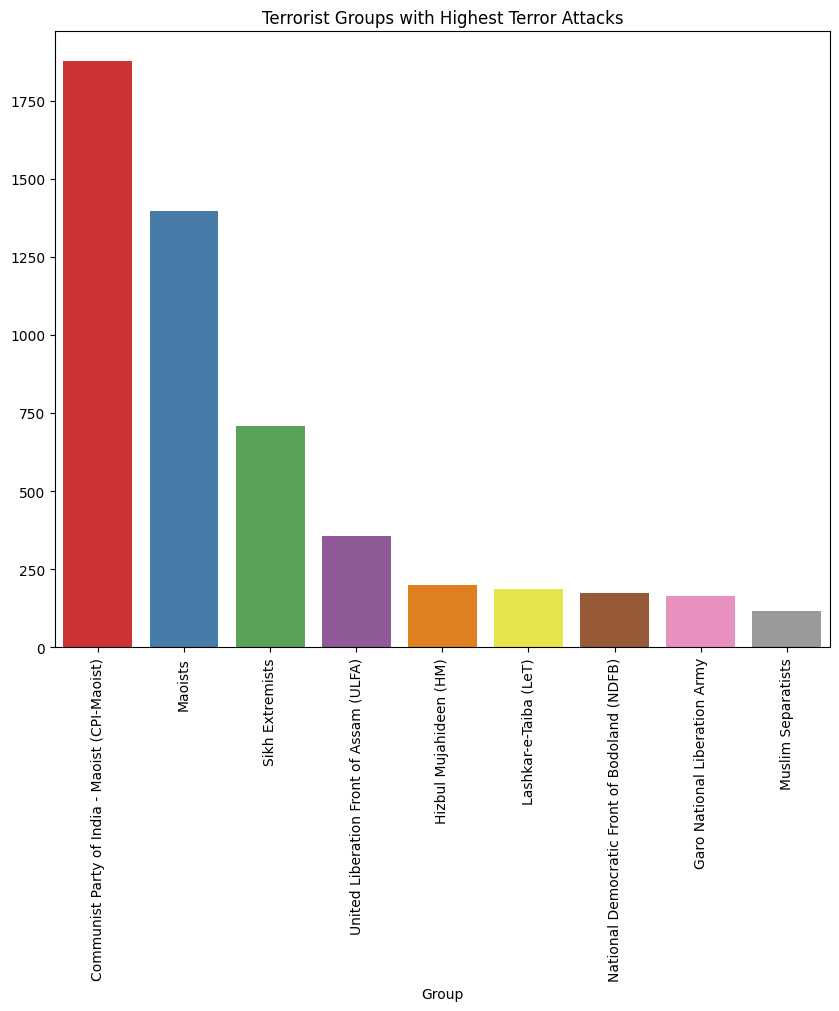

In [27]:
sns.barplot(x=india['Group'].value_counts()[1:10].index, y=india['Group'].value_counts()[1:10].values, palette="Set1")
plt.xticks(rotation=90)
fig = plt.gcf()
# Make sure 'B' is defined or replace it with a numeric value
fig.set_size_inches(10, 8)
plt.title('Terrorist Groups with Highest Terror Attacks')
# Fix typo 'pit' to 'plt'
plt.show()

killing tends diffrent years

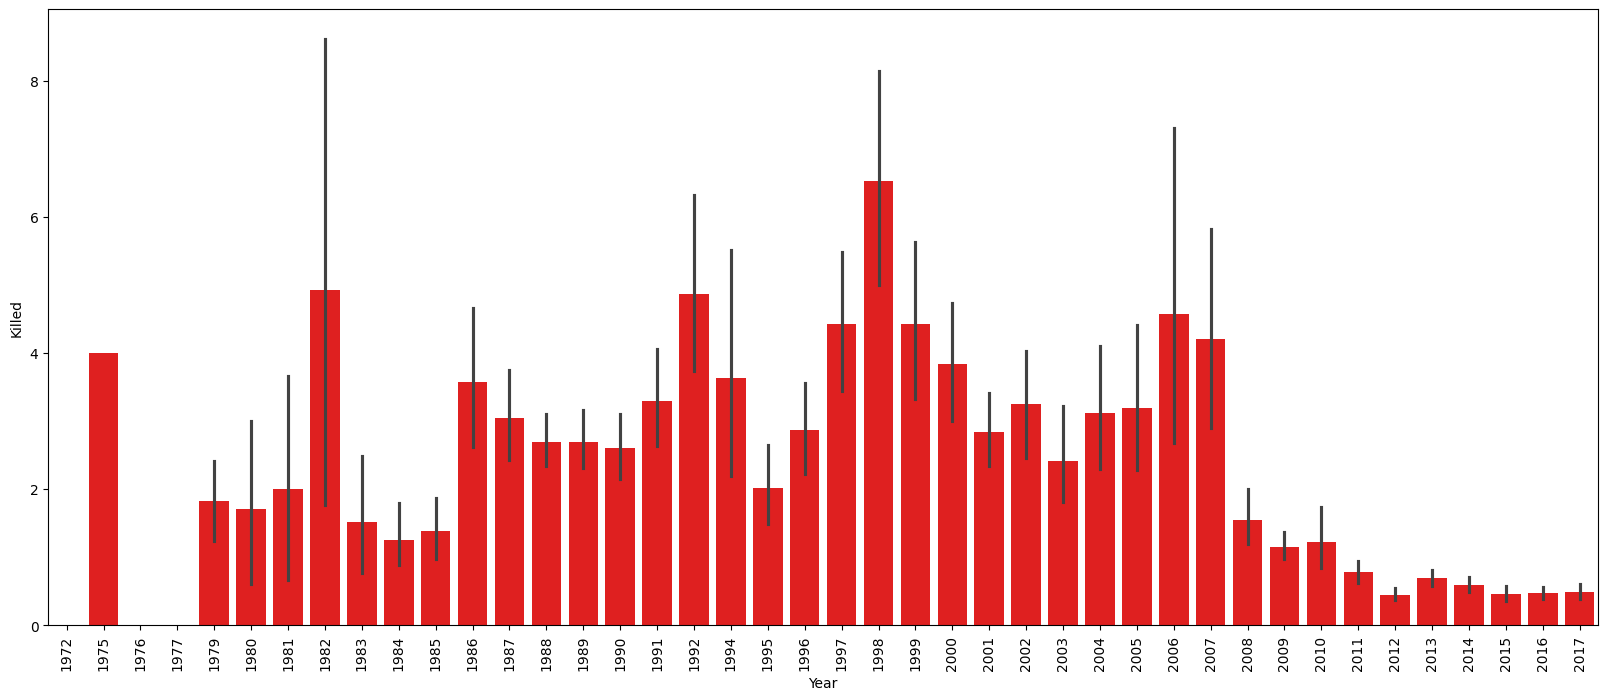

In [30]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Year', y='Killed', data=india, color='red')  # Use x and y parameters
plt.xticks(rotation=90)
plt.show()

most preferrable type of attack in india

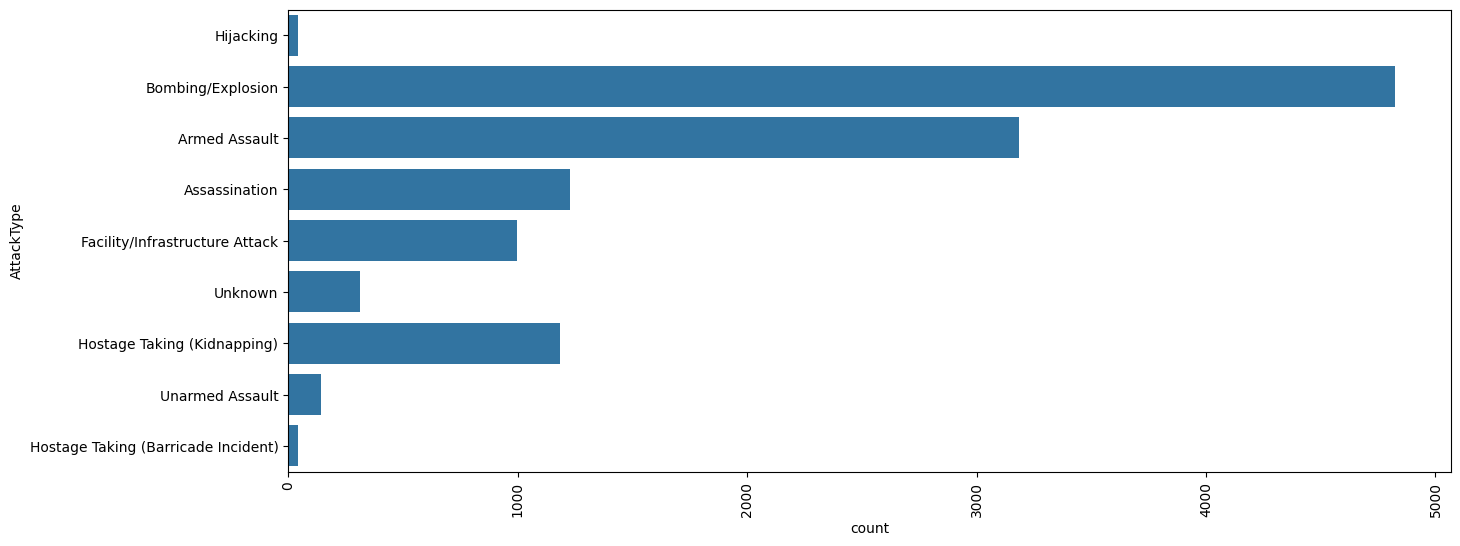

In [32]:
plt.figure(figsize=(15,6))
sns. countplot(india['AttackType'])
plt.xticks(rotation=90)
plt.show()

